# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /Users/rushikesh/python_files/vscode/transformer/src/main/python/

/Users/rushikesh/python_files/vscode/transformer/src/main/python


In [3]:
import torch
import numpy as np
import pandas as pd
from utils.Embeddings.Embeddings import Embeddings
from utils.Attention.Attention import attentionLayer
from utils.Attention.Attention import residualConnection

# Test

In [4]:
## each char is a 
sequence   = list('mango')
x          = [12, 0, 13, 6, 14]

x          =  torch.tensor(x).reshape(1,5)

seq_len    = 5
vocab_size = 26
d_model    = 4 ## d_model should be even for positiona encodings to work

## emb is embeddings class which takes the encoded sequence as the input and returns the (token + pos) encodings
emb        = Embeddings(vocab_size = vocab_size, d_model= d_model, max_len= seq_len)


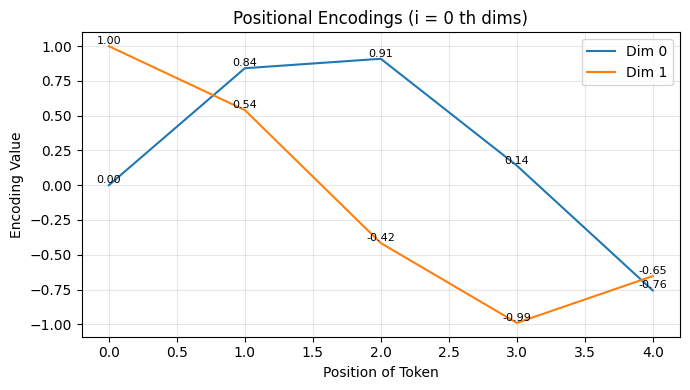

a = 1, b = 2 (Token positions)
sin(a+b) = sin(a).cos(b) + cos(a).sin(b)

sin(a) = 0.8414709568023682
cos(a) = 0.5403023362159729
sin(b) = 0.9092974066734314
cos(b) = -0.416146844625473

sin(1).cos(2) + cos(1).sin(2) = 0.141120046377182; 
sin(3) == 0.14112000167369843

Explaination: 

              
        This property means that for any fixed offset B, the positional encoding of A+B can be obtained by applying a fixed linear transformation (a rotation) to the positional encoding of A.

        This is crucial for the self-attention mechanism. The attention score between a query at position q and a key at position k is based on a dot product. Because of this linear property, the dot product between their positional encodings, PE(q)T
        
        PE(k), depends only on the relative position q-k, not their absolute positions. This allows the model to easily learn how to attend to tokens that are a certain distance away, regardless of where they are in the sequence.
                


In [5]:
## plot positional encodings to understand 

emb.plot_positional_encodings()

In [7]:
x0    = emb(x)

head1 = attentionLayer(num_heads= 1,d_model = d_model, max_len= seq_len)

x1    = head1(x0)

In [8]:
x, x0, x1

(tensor([[12,  0, 13,  6, 14]]),
 tensor([[[ 0.7541,  0.0698, -0.9557,  1.3773],
          [ 1.4961,  0.9061, -0.3850,  1.5422],
          [ 0.1458, -0.3991, -0.2653,  2.0104],
          [ 0.4453, -1.3099,  0.0376,  1.4824],
          [-0.6715, -1.3567, -0.1862,  1.6947]]]),
 tensor([[[-1.8867,  1.7719,  0.6901, -0.0375],
          [-1.5592,  1.2196,  0.3905, -0.2948],
          [-0.9218,  0.8125,  0.3055, -0.0763],
          [-2.4770,  2.0411,  0.5925, -0.4454],
          [-1.5175,  1.5690,  0.6142,  0.0806]]]))

In [9]:
emb.pos_emb.shape

torch.Size([5, 4])

In [10]:
emb.pos_emb[:5, :]

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.0400,  0.9992]])

In [11]:
x.shape, x0.shape, x1.shape

(torch.Size([1, 5]), torch.Size([1, 5, 4]), torch.Size([1, 5, 4]))

In [12]:
rc = residualConnection()

In [13]:
rc(x0, x1)

tensor([[[-1.1326,  1.8416, -0.2656,  1.3398],
         [-0.0631,  2.1257,  0.0055,  1.2475],
         [-0.7760,  0.4134,  0.0402,  1.9341],
         [-2.0317,  0.7312,  0.6300,  1.0369],
         [-2.1890,  0.2123,  0.4280,  1.7753]]])

In [14]:
from utils.Attention.Attention import multiHeads

multiHeadLayer = multiHeads(num_heads = 2, 
                            d_model   = d_model, 
                            max_len   = seq_len)

x1 = multiHeadLayer(x0)

In [15]:
x1

tensor([[[ 0.2136,  0.5395, -0.4047,  1.6530],
         [ 0.2182,  0.4744, -1.4977,  3.7847],
         [ 0.2011,  0.6077, -0.5026,  1.6345],
         [ 0.0489,  0.9463, -0.3096,  1.3777],
         [ 0.1375,  0.7868, -0.2259,  0.9186]]])

In [16]:
rc(x0, x1)

tensor([[[ 0.9677,  0.6093, -1.3604,  3.0303],
         [ 1.7143,  1.3806, -1.8827,  5.3269],
         [ 0.3469,  0.2086, -0.7679,  3.6449],
         [ 0.4942, -0.3636, -0.2720,  2.8601],
         [-0.5341, -0.5700, -0.4122,  2.6133]]])

In [35]:
from utils.FFN.FFN import feedForward

x2 = rc(x0, x1)

FFN = feedForward(d_model = 4, max_len = 5, vocab_size = vocab_size)

x3  = FFN(x2)

In [36]:
x2.shape

torch.Size([1, 5, 4])

In [37]:
x3.shape

torch.Size([1, 5, 26])

In [40]:
x3.sum(dim = 2)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])